#### Mise en oeuvre de l'algorithme de renforcement du Gradient extrême pour l'identification du verre à l'aide de XGboot

In [3]:
import os
import pandas as pd
import numpy as np

from numpy import sort
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

import itertools

In [4]:
df_glassdata = pd.read_csv(r'C:\Users\lahat\Documents\M2IMSD\Formation_ML_Udemy\Gradient_Boosting\glassdata.csv')

In [5]:
X = df_glassdata.iloc[:,1:10]

In [6]:
Y = df_glassdata.iloc[:,10]

In [7]:
df_glassdata.isnull().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_de_verre    0
dtype: int64

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [9]:
#Premièrement, nous intégrons nos données de train dans le classifieur XGBoost:

#CONSTRUCTION DU MODEL
xg_model = XGBClassifier()

In [10]:
xg_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
#PREDICTION
test_predictions = xg_model.predict(X_test)

In [12]:
#Evaluation du modele

test_accuracy = accuracy_score(Y_test, test_predictions)

In [13]:
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 70.77%


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

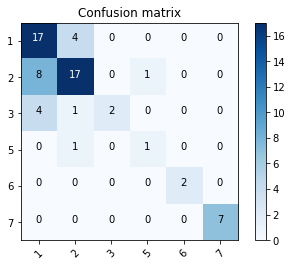

In [15]:
class_cible = [ '1', '2', '3', '5', '6', '7']  
cm = confusion_matrix(Y_test, test_predictions)
plt.figure()
plot_confusion_matrix(cm, classes=class_cible)
plt.show()